### Notes on latent semantic indexing

Let ${X}$ be a matrix where element ${(i,j)}$ describes the occurrence of term $i$ in document $j$ (this can be, for example, the frequency). $X$ will look like this:

$${\begin{matrix}&{\textbf {d}}_{j}\\&\downarrow \\{\textbf {t}}_{i}^{T}\rightarrow &{\begin{bmatrix}x_{1,1}&\dots &x_{1,n}\\\vdots &\ddots &\vdots \\x_{m,1}&\dots &x_{m,n}\\\end{bmatrix}}\end{matrix}}$$

Now a row in this matrix will be a vector corresponding to a term, giving its relation to each document:

$${\textbf {t}}_{i}^{T}={\begin{bmatrix}x_{i,1}&\dots &x_{i,n}\end{bmatrix}}$$

Likewise, a column in this matrix will be a vector corresponding to a document, giving its relation to each term:

$${\textbf {d}}_{j}={\begin{bmatrix}x_{1,j}\\\vdots \\x_{m,j}\end{bmatrix}}$$

Now the dot product ${\displaystyle {\textbf {t}}_{i}^{T}{\textbf {t}}_{p}}$ between two term vectors gives the correlation between the terms over the set of documents. The matrix product ${\displaystyle XX^{T}}$ contains all these dot products. Element ${\displaystyle (i,p)}$ (which is equal to element ${\displaystyle (p,i)}$) contains the dot product ${\displaystyle {\textbf {t}}_{i}^{T}{\textbf {t}}_{p}}$ (${\displaystyle ={\textbf {t}}_{p}^{T}{\textbf {t}}_{i}}$). Likewise, the matrix ${\displaystyle X^{T}X}$ contains the dot products between all the document vectors, giving their correlation over the terms: ${\displaystyle {\textbf {d}}_{j}^{T}{\textbf {d}}_{q}={\textbf {d}}_{q}^{T}{\textbf {d}}_{j}}$.

Now, from the theory of linear algebra, there exists a decomposition of ${\displaystyle X}$ such that ${\displaystyle U}$ and ${\displaystyle V}$ are orthogonal matrices and ${\displaystyle \Sigma }$ is a diagonal matrix. This is called a **singular value decomposition (SVD)**:

$$\large{\begin{matrix}X=U\Sigma V^{T}\end{matrix}}$$

The matrix products giving us the term and document correlations then become

$$\large{\displaystyle {\begin{matrix}XX^{T}&=&(U\Sigma V^{T})(U\Sigma V^{T})^{T}=(U\Sigma V^{T})(V^{T^{T}}\Sigma ^{T}U^{T})=U\Sigma V^{T}V\Sigma ^{T}U^{T}=U\Sigma \Sigma ^{T}U^{T}=U\Sigma ^{2}U^{T}\\X^{T}X&=&(U\Sigma V^{T})^{T}(U\Sigma V^{T})=(V^{T^{T}}\Sigma ^{T}U^{T})(U\Sigma V^{T})=V\Sigma ^{T}U^{T}U\Sigma V^{T}=V\Sigma ^{T}\Sigma V^{T}=V\Sigma ^{2}V^{T}\end{matrix}}}$$

Since ${\displaystyle \Sigma \Sigma ^{T}}$ and ${\displaystyle \Sigma ^{T}\Sigma }$ are diagonal we see that ${\displaystyle U}$ must contain the eigenvectors of ${\displaystyle XX^{T}}$, while ${\displaystyle V}$ must be the eigenvectors of ${\displaystyle X^{T}X}$. Both products have the same non-zero eigenvalues, given by the non-zero entries of ${\displaystyle \Sigma \Sigma ^{T}}$, or equally, by the non-zero entries of ${\displaystyle \Sigma ^{T}\Sigma }$. Now the decomposition looks like this:

$${\begin{matrix}&X&&&U&&\Sigma &&V^{T}\\&({\textbf {d}}_{j})&&&&&&&({\hat {\textbf {d}}}_{j})\\&\downarrow &&&&&&&\downarrow \\({\textbf {t}}_{i}^{T})\rightarrow &{\begin{bmatrix}x_{1,1}&\dots &x_{1,n}\\\\\vdots &\ddots &\vdots \\\\x_{m,1}&\dots &x_{m,n}\\\end{bmatrix}}&=&({\hat {\textbf {t}}}_{i}^{T})\rightarrow &{\begin{bmatrix}{\begin{bmatrix}\,\\\,\\{\textbf {u}}_{1}\\\,\\\,\end{bmatrix}}\dots {\begin{bmatrix}\,\\\,\\{\textbf {u}}_{l}\\\,\\\,\end{bmatrix}}\end{bmatrix}}&\cdot &{\begin{bmatrix}\sigma _{1}&\dots &0\\\vdots &\ddots &\vdots \\0&\dots &\sigma _{l}\\\end{bmatrix}}&\cdot &{\begin{bmatrix}{\begin{bmatrix}&&{\textbf {v}}_{1}&&\end{bmatrix}}\\\vdots \\{\begin{bmatrix}&&{\textbf {v}}_{l}&&\end{bmatrix}}\end{bmatrix}}\end{matrix}}$$

The values ${\displaystyle \sigma _{1},\dots ,\sigma _{l}}$ are called the singular values, and ${\displaystyle u_{1},\dots ,u_{l}} u_{1},\dots ,u_{l}$ and ${\displaystyle v_{1},\dots ,v_{l}}$ the left and right singular vectors. Notice the only part of ${\displaystyle U}$ that contributes to ${\displaystyle {\textbf {t}}_{i}}$ is the ${\displaystyle i{\textrm {'th}}}$ row. Let this row vector be called ${\displaystyle {\hat {\textrm {t}}}_{i}^{T}}$. Likewise, the only part of ${\displaystyle V^{T}}$ that contributes to ${\displaystyle {\textbf {d}}_{j}}$ is the ${\displaystyle j{\textrm {'th}}}$ column, ${\displaystyle {\hat {\textrm {d}}}_{j}}$. These are not the eigenvectors, but depend on all the eigenvectors.

It turns out that when you select the ${\displaystyle k}$ largest singular values, and their corresponding singular vectors from ${\displaystyle U}$ and ${\displaystyle V}$, you get the rank ${\displaystyle k}$ approximation to ${\displaystyle X}$ with the smallest error (Frobenius norm). This approximation has a minimal error. But more importantly we can now treat the term and document vectors as a "semantic space". The row "term" vector ${\displaystyle {\hat {\textbf {t}}}_{i}^{T}}$ then has ${\displaystyle k}$ entries mapping it to a lower-dimensional space dimensions. These new dimensions do not relate to any comprehensible concepts. They are a lower-dimensional approximation of the higher-dimensional space. Likewise, the "document" vector ${\displaystyle {\hat {\textbf {d}}}_{j}}$ is an approximation in this lower-dimensional space. We write this approximation as:

$$\large {\displaystyle X_{k}=U_{k}\Sigma _{k}V_{k}^{T}}$$

**For more info, read [this](https://en.wikipedia.org/wiki/Latent_semantic_analysis#Overview)**

### 1A

Documents 7 and 8 appear to the closest to each other in terms of feature values in the right-singular vectors of $V$.

List of 3
 $ d: num [1:9] 279.8 72.8 66.4 47 41.8 ...
 $ u: num [1:460, 1:9] -0.00603 -0.00196 -0.00374 -0.0025 -0.00252 ...
 $ v: num [1:9, 1:9] -0.296 -0.313 -0.274 -0.349 -0.23 ...


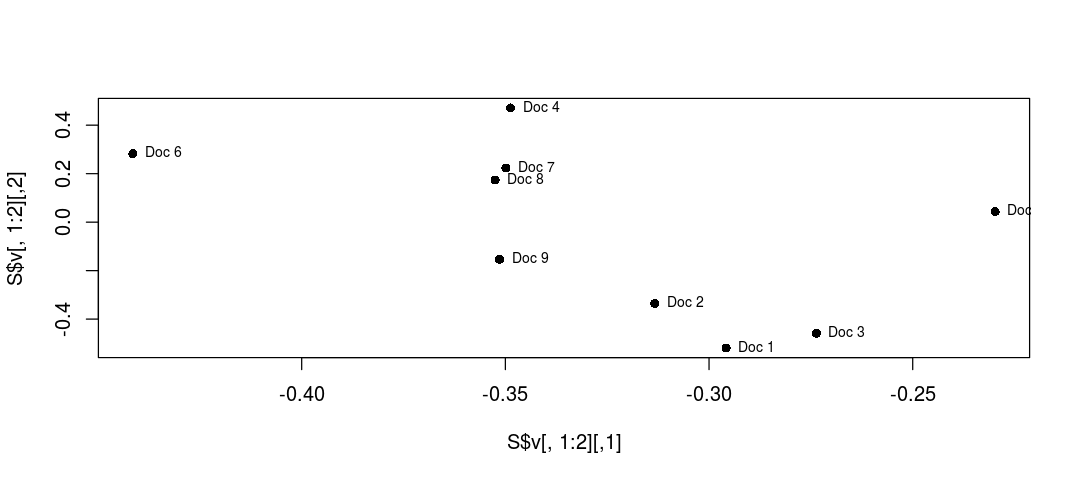

In [80]:
dtm <- read.table("csv/lsiMatrix.txt") # each row represents one document
X <- t(dtm)

# calculating SVD of X
S <- svd(X)
str(S)

# making rank-2 approximation of X
# NOTE: `d` diagonal matrix here is in the form of a vector; needs `diag(d)` for matrix form
Xcomp <- S$u[,1:2]%*%diag(S$d[1:2])%*%t(S$v[,1:2])
colnames(Xcomp) <- c("Doc 1", "Doc 2", "Doc 3",
                     "Doc 4", "Doc 5", "Doc 6",
                     "Doc 7", "Doc 8", "Doc 9")
rownames(Xcomp) <- c(1:NROW(Xcomp))

# plotting right-singular vectors of Xcomp
options(repr.plot.width=9, repr.plot.height=4) # resize IRkernel plot size
plot(S$v[,1:2], pch=16)
text(S$v[,1:2], labels=colnames(Xcomp), cex=0.7, pos=4)

### 1B

Project onto 2D subspace with ${\hat {\textbf {d}}}_{j}=\Sigma _{k}^{-1}U_{k}^{T}{\textbf {d}}_{j}$ (single doc) or ${\hat {D}_k}=\Sigma _{k}^{-1}U_{k}^{T}{D}$ (multiple docs).

**ANSWER:** Observe that documents **1, 3, 2** are the closest matches to test document (query) $q$

In [123]:
words <- as.matrix(read.table("csv/lsiWords.txt", quote=""))
# indeed there are a total of 460 words as stated in the document-term matrix in part 1A


# create test document `q` with only one word, "abducted"
# "abducted" = Term 23
q <- matrix(0, NROW(words), 1)
q[23] <- 1


# projecting onto the low-dimensional SVD space of `Xcomp`
q_hat <- solve(diag(S$d[1:2]))%*%t(S$u[,1:2])%*%q
ld <- as.matrix(cbind(t(S$v[,1:2]) , q_hat))
colnames(ld) <- c(1:(NCOL(ld)-1), "q")
ld


# calculating cosine similarity of `q` against `Xcomp`
cosineSim <- function(x){
  x%*%t(x)/(sqrt(rowSums(x^2) %*% t(rowSums(x^2)))) 
}
sim <- cosineSim(t(ld))
rownames(sim) <- c(1:(NROW(sim)-1), "q")
colnames(sim) <- c(1:(NCOL(sim)-1), "q")
sim[order(sim[,"q"], decreasing=T),]

1,2,3,4,5,6,7,8,9,q
-0.2957907,-0.3133317,-0.2736472,-0.3487357,-0.22977276,-0.4414378,-0.3498604,-0.3525045,-0.3514359,-3.450056e-05
-0.5192527,-0.3357815,-0.4586579,0.4709308,0.04358919,0.2824398,0.2234786,0.1737935,-0.1538357,-6.401748e-04


,1,2,3,4,5,6,7,8,9,q
q,0.89428669,0.7667802,0.88509672,-0.7704501,-0.1332401,-0.49283394,-0.49218350,-0.39329417,0.4497164,1.0000000
1,1.00000000,0.9729724,0.99979734,-0.4037254,0.3243497,-0.05135942,-0.05061302,0.05971437,0.8018647,0.8942867
3,0.99979734,0.9774240,1.00000000,-0.3852257,0.3433271,-0.03124409,-0.03049707,0.07979783,0.8137308,0.8850967
2,0.97297242,1.0000000,0.97742402,-0.1815483,0.5340204,0.18064531,0.18138034,0.28860973,0.9181690,0.7667802
9,0.80186468,0.9181690,0.81373085,0.2229130,0.8252875,0.55553381,0.55615509,0.64432228,1.0000000,0.4497164
5,0.32434971,0.5340204,0.34332710,0.7344711,1.0000000,0.92803042,0.92830856,0.96361756,0.8252875,-0.1332401
8,0.05971437,0.2886097,0.07979783,0.8891394,0.9636176,0.99383120,0.99391381,1.00000000,0.6443223,-0.3932942
7,-0.05061302,0.1813803,-0.03049707,0.9341414,0.9283086,0.99999972,1.00000000,0.99391381,0.5561551,-0.4921835
6,-0.05135942,0.1806453,-0.03124409,0.9344079,0.9280304,1.00000000,0.99999972,0.99383120,0.5555338,-0.4928339
4,-0.40372539,-0.1815483,-0.38522567,1.0000000,0.7344711,0.93440789,0.93414141,0.88913941,0.2229130,-0.7704501


### 2A

$hours = 1330.48 - 442.09*kidslt6 - 32.78*kidsage6 - 30.51*age + 28.76*educ + 65.67*exper - 3.45*nwifeinc - 0.70*exper2$

$R^2 = 0.2656$

$Adjusted \: R^2 = 0.2587$

Results indicate **exper2** is significant at the 5% level. However, the **exper2** variable does not show if experience has an increasing/decreasing marginal rate on wage, merely on hours worked.

In [62]:
mroz <- read.csv("csv/mroz.csv")
str(mroz)

# define new var (square of mroz$exper)
mroz$exper2 <- mroz$exper^2

# run linear regression using ALL variables
model2A <- lm(hours~., mroz)
summary(model2A)

'data.frame':	753 obs. of  7 variables:
 $ hours   : int  1610 1656 1980 456 1568 2032 1440 1020 1458 1600 ...
 $ kidslt6 : int  1 0 1 0 1 0 0 0 0 0 ...
 $ kidsge6 : int  0 2 3 3 2 0 2 0 2 2 ...
 $ age     : int  32 30 35 34 31 54 37 54 48 39 ...
 $ educ    : int  12 12 12 12 14 12 16 12 12 12 ...
 $ exper   : int  14 5 15 6 7 33 11 35 24 21 ...
 $ nwifeinc: num  10.9 19.5 12 6.8 20.1 ...



Call:
lm(formula = hours ~ ., data = mroz)

Residuals:
    Min      1Q  Median      3Q     Max 
-1511.3  -537.8  -146.9   538.1  3555.6 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1330.4824   270.7846   4.913 1.10e-06 ***
kidslt6     -442.0899    58.8466  -7.513 1.66e-13 ***
kidsge6      -32.7792    23.1762  -1.414   0.1577    
age          -30.5116     4.3639  -6.992 6.04e-12 ***
educ          28.7611    12.9546   2.220   0.0267 *  
exper         65.6725     9.9630   6.592 8.23e-11 ***
nwifeinc      -3.4466     2.5440  -1.355   0.1759    
exper2        -0.7005     0.3246  -2.158   0.0312 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 750.2 on 745 degrees of freedom
Multiple R-squared:  0.2656,	Adjusted R-squared:  0.2587 
F-statistic:  38.5 on 7 and 745 DF,  p-value: < 2.2e-16


### 2B

The number of predicted values below zero is much lower than that of the actual number of workers without work at all. I.e., unemployment is censored and "absorbed" into the all-encompassing "zero" value which skews the probability distribution of the number of hours worked, hence the results obtained.

In [117]:
predict2B <- predict(model2A, mroz)

# get number of predicted values below 0
length(predict2B[predict2B<0])

# get number of actual values at 0
length(mroz$hours[mroz$hours==0])

[1] 39

[1] 325

### 2C

*Linear regression*
$hours = 1330.48 - 442.09*kidslt6 - 32.78*kidsage6 - 30.51*age + 28.76*educ + 65.67*exper - 3.45*nwifeinc - 0.70*exper2$

*Tobit model*
$hours^* (latent) = 965.31 - 894.02*kidslt6 - 16.22*kidsage6 - 54.41*age + 80.65*educ + 131.56*exper - 8.81*nwifeinc - 1.86exper2$

All coefficients still have the same sign, although larger in magnitude (except `intercept` and `kidsage6`). This has the effect of increasing the probability of creating latent (unobservable) samples that are smaller in value, perhaps even negative.

In [122]:
library(survival)
model2C <- survreg(Surv(hours, hours>0, type="left")~., data=mroz, dist="gaussian")
summary(model2C)

# predicting with Tobit
predict2C <- predict(model2C, mroz)

# get number of predicted values below 0
length(predict2C[predict2C<0])


Call:
survreg(formula = Surv(hours, hours > 0, type = "left") ~ ., 
    data = mroz, dist = "gaussian")
              Value Std. Error      z        p
(Intercept)  965.31   446.4361   2.16 3.06e-02
kidslt6     -894.02   111.8780  -7.99 1.34e-15
kidsge6      -16.22    38.6414  -0.42 6.75e-01
age          -54.41     7.4185  -7.33 2.24e-13
educ          80.65    21.5832   3.74 1.87e-04
exper        131.56    17.2794   7.61 2.66e-14
nwifeinc      -8.81     4.4591  -1.98 4.81e-02
exper2        -1.86     0.5377  -3.47 5.26e-04
Log(scale)     7.02     0.0371 189.51 0.00e+00

Scale= 1122 

Gaussian distribution
Loglik(model)= -3819.1   Loglik(intercept only)= -3954.9
	Chisq= 271.59 on 7 degrees of freedom, p= 0 
Number of Newton-Raphson Iterations: 4 
n= 753 


[1] 265

### 2D

Tobit model is preferred since $R_{tobit}^2 = 0.2742$, whilst the linear regression model has $R_{lin}^2 = 0.2656$.

In [143]:
scale <- 1122

# calculate predicted mean value for dependent variable
expected <- predict2C*pnorm(predict2C/scale) + scale*dnorm(predict2C/scale)

rsq_tobit <- cor(expected, mroz$hours)^2
rsq_tobit

[1] 0.274244

### 2E

**FOR REFERENCE**<br>
*Linear regression*
$hours = 1330.48 - 442.09*kidslt6 - 32.78*kidsage6 - 30.51*age + 28.76*educ + 65.67*exper - 3.45*nwifeinc - 0.70*exper2$

*Tobit model*
$hours^* (latent) = 965.31 - 894.02*kidslt6 - 16.22*kidsage6 - 54.41*age + 80.65*educ + 131.56*exper - 8.81*nwifeinc - 1.86exper2$

___

$hours = 387.1927 + 28.76*educ$

When $educ=8$, $hours=617.33$<br>When $educ=12$, $hours=732.37$

Estimated values from the Tobit model are consistently higher than that from the linear model. However, from the plot below, we can see that there the marginal effect of education on the hours worked remains constant.

617.2817


732.3262


-48.95051


273.6319


Warning message in tob_int + tob_coeff[5] * c(1:20):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”

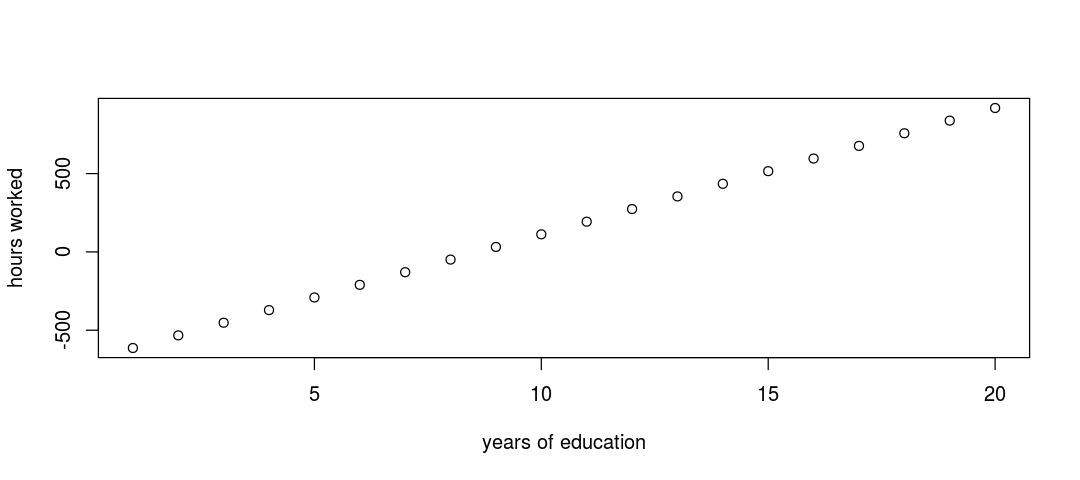

In [187]:
avg <- (colSums(mroz)/NROW(mroz))[c(-1, -5)]

# get intercept value of linear equation as a function of the education level from linear regression model
lin_coeff <- model2A$coefficients
lin_int <- lin_coeff[1] + t(lin_coeff[c(-1,-5)])%*%avg

# get `hours` when `educ=8 or 12` from linear equation
lin8 <- lin_int + lin_coeff[5]*8
lin12 <- lin_int + lin_coeff[5]*12
lin8
lin12


# get intercept value of linear equation as a function of the education level from Tobit model
tob_coeff <- model2C$coefficients
tob_int <- tob_coeff[1] + t(tob_coeff[c(-1,-5)])%*%avg

# get `hours` when `educ=8 or 12` from Tobit model
tob8 <- tob_int + tob_coeff[5]*8
tob12 <- tob_int + tob_coeff[5]*12
tob8
tob12

tob <- tob_int + tob_coeff[5]*c(1:20)
plot(tob, xlab="years of education", ylab="hours worked")